# 機械学習を用いた因果推論の全体像

## 全体像

機械学習を用いた因果推論の目的<br>

1.   因果効果の推定とその予測精度はどれくらいか<br>
     例：DR,RDD,IV,DiD,SC（第4章）
2.   複数の選択肢の中で期待効用が最大化するものはどれか<br>


1.に答える手法は大きく分けて二つある。
[異質処置効果 (Heterogeneous Treatment Effect)への対応](https://qiita.com/ssugasawa/items/15ca8ae09477c5023c1e)

1.   メタラーナー：複数の基本的な予測モデルを組み合わせて複雑性に対応
2.   既存の機械学習手法をCATEを直接推定するために変更(Causal Forest,Causal BART)<br>
[reveiw]CATE は、条件付き平均処置効果 (Conditional Average Treatment Effect) の略です。これは、共変量の値によって定義される処置効果の平均値を指し、異なる特性を持つサブグループごとの処置効果を理解するために使われます。





## 注意点



1.   識別仮定について<br>
機械学習のみを用いたとき…（例：結果＝航空券の売上、処置＝航空券の価格）
*   交絡因子により因果関係を誤る可能性（例：交絡因子＝休日、「座席が満席に近づくと価格を上げる」が「価格が上がれば売り上げも上がる」に勘違い）<br>→因果推論のフレームワークを適切に使用
*   処置変数が潜在的結果変数と独立ではない可能性（例：未観測の交絡因子＝イベント　があるとき）<br>→操作変数法（例：処置にのみ影響を与える変数「燃料費」を追加）
----------------------------------
[補足]<br>
✅ 因果推論のフレームワークとは

主な因果推論のフレームワーク
*  ルービンの因果モデル（Rubin Causal Model, RCM）:「処置群」と「対照群」を比較して因果効果を推定/実験的設計（ランダム化）または観察データに対して傾向スコアなどを用いる
*  構造的因果モデル（Structural Causal Model, SCM）:ジューディア・パール（Judea Pearl）の提唱/**因果グラフ（DAG：有向非巡回グラフ）**で変数間の因果関係を可視化
do演算子（do(X=x)）を用いて「介入時の世界」を理論的に記述
*  反実仮想（Counterfactual）分析:「もし価格が1万円ではなく8000円だったら、売上はどうだったか？」というような「実際には起きなかった世界」を推定
-------------------------------------

2.   推定について
*   学習時と予測時においてデータの性質が異なる可能性（**分布シフトの発生**）:独立同一分布の仮定（iid）を満たさない為性能が低下する。分布シフトには共変量シフト（共変量が従う確率分布が異なる）とターゲットシフト（目的変数が従う確率分布が異なる）がある。<br>→分布シフトを起こすデータOODに対応する汎化的な手法　や　オンライン（現実）でのテストが可能であればA/Bテスト
*   過適合と正則化バイアス(本来表現すべき関係まで単純化)の可能性<br>→DML
*   データの質が悪く、CATEを推定できない可能性:CATEの点推定により精度のばらつき<br>→医療分野においてCATEの範囲を表現する方法が提案
-------------------------------------------------
[補足]

分布シフト

| タイプ                         | 説明                                                        |
| --------------------------- | --------------------------------------------------------- |
| **共変量シフト**（Covariate Shift） | 説明変数 $X$ の分布 $P(X)$ が変わる。例：訓練データでは若年層中心だったが、本番では高齢者中心になる。 |
| **ターゲットシフト**（Target Shift）  | 目的変数 $Y$ の分布 $P(Y)$ が変わる。例：病気の罹患率が季節で変動する。                |
| **概念シフト**（Concept Shift）    | $P(Y \mid X)$ 自体が変わる。例：ユーザーの行動パターンや社会的価値観の変化。最も深刻なタイプ。    |

--------------------------------------------------------

3.   結果および、モデルの解釈性・公平性について
*   モデルが複雑になり、解釈・説明の難易度が上がる<br>→SHAP
*   不当な差別を助長する予測をする可能性<br>→モデルの設計段階でセンシティブな情報に関連する決定が公平・無差別になるように設計
---------------------------------------------
[補足]<br>
SHAP（SHapley Additive exPlanations）

SHAPは、機械学習モデルの予測に対する各特徴量の貢献度（影響度）を説明する手法です。ブラックボックスなモデル（例：XGBoost、深層学習など）でも、出力が「なぜその値になったのか」を個別に説明できるため、解釈性の向上に大きく貢献します。

背景：ゲーム理論のShapley値に基づく

特徴：1件ごとの予測に対して「どの特徴量がどれだけ影響を与えたか」を可視化

モデルに依存せず使える（モデル非依存型）

因果推論文脈では：CATE（個別処置効果）の説明にも使われる

-----------------------------------------------------


# メタラーナー

[Meta-Learners](https://deus-ex-machina-ism.com/?p=70159)<br>

目的：CATEの予測の高精度化

1. 因果関係の特定: たとえば**異なるデータセットや環境での因果関係**を学習する際に役立つ。

2. タスク間の知識の転移: 異なるタスク間で学習した知識を転移し、新しい因果推論タスクでの学習速度を向上させることができる。


このようにMeta-Learnersを用いることで、従来の因果推論モデルに比べ、より柔軟で高精度な因果推論が可能となる。

--------------------------
アルゴリズム

異なるモデルや学習手法を組み合わせて、介入効果や因果関係をより正確に推定するために設計されている。これらのアルゴリズムは、個々のサブグループや個人ごとの効果の推定や、データのバイアスを補正する際に特に有用となる。

1. S-learner（Single-learner）

概要

S-learner は、処置変数（例：介入の有無）を特徴量の一部として1つのモデルに統合し、アウトカムを予測します。

実行手順

1. 全データ（処置群と対照群）を用いて、特徴量 X と処置変数 T を入力とし、アウトカム Y を予測するモデル μ(x, t) を構築。
2. 各個体について、処置あり（T=1）と処置なし（T=0）の予測値を計算。
3. その差分を CATE として推定。

特徴

* **長所**:

  * 全データを活用でき、実装が比較的容易。
  * 処置効果が均一であると仮定される場合に有効。
* **短所**:

  * 処置効果の異質性を捉える能力が限定的。（バイアスの発生）
  * 処置群と対照群のデータ数が不均衡な場合、精度が低下する可能性。
  * 正則化により推定される処置効果が制限される可能性。


 2. T-learner（Two-learner）

概要

T-learner は、処置群と対照群それぞれに別々のモデルを構築し、アウトカムを予測します。

 実行手順

1. 処置群のデータを用いて、特徴量 X を入力とし、アウトカム Y を予測するモデル μ₁(x) を構築。
2. 対照群のデータを用いて、同様にモデル μ₀(x) を構築。
3. 各個体について、μ₁(x) - μ₀(x) を CATE として推定。

 特徴

* **長所**:

  * 処置効果の異質性を捉える能力が高い。
  * 処置群と対照群の特性が大きく異なる場合に有効。
* **短所**:

  * 処置群と対照群のデータ数が不均衡な場合、精度が低下する可能性。
  * 2つのモデルを構築するため、実装がやや複雑。


 3. X-learner

 概要

X-learner は、T-learner のアプローチを拡張し、処置効果の異質性が高く、処置群と対照群のデータ数が不均衡な場合に有効です。

 実行手順

1. 処置群と対照群それぞれにモデル μ₁(x) と μ₀(x) を構築。
2. 各個体について、以下を計算：

   * 処置群：D₁ = Y - μ₀(x)
   * 対照群：D₀ = μ₁(x) - Y
3. D₁ と D₀ をそれぞれの群でモデル化し、τ₁(x) と τ₀(x) を推定。
4. 傾向スコア（処置を受ける確率）g(x)を用いて、τ(x) = g(x) \* τ₀(x) + (1 - g(x)) \* τ₁(x) を計算し、CATE を推定。

 特徴

* **長所**:

  * 処置効果の異質性を詳細に捉える能力が高い。
  * 処置群と対照群のデータ数が不均衡な場合でも精度が高い。
* **短所**:

  * 実装が複雑で、計算コストが高い。
  * 複数のモデルを構築する必要がある。


 4. DR-learner（Doubly Robust-learner）

 概要

DR-learner は、傾向スコアとアウトカムモデルの両方を組み合わせて、CATE を推定する手法で、いずれか一方のモデルが正確であれば推定が可能な「**二重ロバスト性**」を持ちます。

実行手順

1. 傾向スコア（処置を受ける確率）を推定。
2. 処置群と対照群それぞれにアウトカムモデル μ₁(x) と μ₀(x) を構築。
3. 各個体について、以下の擬似アウトカムを計算：

   * Z = \[(T - g(x)) / (g(x)(1 - g(x)))] \* (Y - μ\_T(x)) + μ₁(x) - μ₀(x)
4. Z を目的変数として、特徴量 X を入力とするモデルを構築し、CATE を推定。

 特徴

* **長所**:

  * 傾向スコアまたはアウトカムモデルのいずれかが正確であれば、CATE の推定が可能。
  * モデルの誤指定に対してロバスト。
* **短所**:

  * 実装が複雑で、複数のモデルを構築する必要がある。
  * 傾向スコアとアウトカムモデルの推定精度が結果に大きく影響する。


 比較表

| メタラーナー     | 実装の容易さ | 処置効果の異質性への対応 | データ数の不均衡への対応 | 二重ロバスト性 |   |
| ---------- | ------ | ------------ | ------------ | ------- | - |
| S-learner  | 高      | 低            | 低            | なし      |   |
| T-learner  | 中      | 中            | 低            | なし      |   |
| X-learner  | 低      | 高            | 高            | なし      |   |
| DR-learner | 低      | 高            | 高            | あり      |   |



 実務での選択ガイド

* **S-learner**: データ数が少なく、処置効果が均一であると仮定される場合に適しています。
* **T-learner**: 処置群と対照群の特性が大きく異なる場合に有効です。
* **X-learner**: 処置効果の異質性が高く、処置群と対照群のデータ数が不均衡な場合に適しています。
* **DR-learner**: モデルの誤指定に対してロバストであり、実務での利用が推奨されます。

実務では、DR-learner のような二重ロバスト性を持つ手法が、モデルの誤指定に対する耐性があり、信頼性の高い推定が可能です。

------------------------
[補足]

5 R-Learner:

概要: R-Learnerは、残差を用いた手法で、観測データから介入効果を推定している。これらは、一般化線形モデル（GLM）や機械学習モデルを組み合わせて使用する。

実装手順:
1. 結果変数と介入変数を、それぞれ共変量に対して回帰し、残差を計算する。
2. 残差間の関係をモデル化し、介入効果を推定する。

特徴: モデルの選択や調整に柔軟性があり、さまざまな機械学習アルゴリズムと組み合わせ可能で、強い共変量の影響を効果的にコントロールできる。

適用例: 経済学における政策評価や、公衆衛生分野での介入効果の測定等。

6 U-Learner:

概要: U-Learnerは、S-LearnerとT-Learnerの特性を組み合わせた手法で、ユニバーサルなアプローチを提供している。これらは、介入効果と共変量の相互作用を同時にモデル化する。

実装手順:
1. 全データを用いて、結果変数を予測するモデルを訓練する。
2. モデル内で介入変数と共変量の相互作用項を含め、効果を推定する。

特徴: 単一のモデルで複雑な相互作用を捉えることができ、実装が比較的簡単で、解釈性も高い。

適用例: 教育分野でのカリキュラム効果の評価や、金融業界でのリスク管理施策の効果測定等。

--------------------------------------

例：CATEを推定するために、メタラーナーのどのモデルが最も精度が高いか？また、推定したCATE（顧客の収入別のキャンペーン効果）はどの程度か？

In [ ]:
!pip install econml==0.14.0 scikit-learn==1.1.3

  Using cached econml-0.14.0.tar.gz (1.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 44.0 MB/s eta 0:00:00
  Created wheel for econml: filename=econml-0.14.0-cp311-cp311-linux_x86_64.whl size=3144027 sha256=b7c87688c7c795a475674f13e8fb707a16344e0037ca0ab13633bbb837463943
  Stored in directory: /root/.cache/pip/wheels/d7/c7/ae/7e399d03674bed90c2d637a2a6fb799cadb6e51b969d563188
  Created wheel for shap: filename=shap-0.40.0-cp311-cp311-linux_x86_64.whl size=515312 sha256=a35b71eb11b83e8e688cb9b40e80afdc55f0c51d5f75dae0ab056d2fe42e336b
  Stored in directory: /root/.cache/pip/wheels/ac/0e/91/2326cd1e039c5e654e588168f49ca304e9b0e

In [ ]:
from econml.metalearners import TLearner, SLearner, XLearner
from econml.dr import DRLearner
import numpy as np
from numpy.random import binomial, multivariate_normal, normal, uniform
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
def generate_data(n, d, controls_outcome, treatment_effect, propensity):

  # 共変量の生成＝顧客の収入などの顧客情報
  X = multivariate_normal(np.zeros(d), np.diag(np.ones(d)), n) #平均が0で、共分散が単位行列である多変量正規分布から共変量を生成

  # 処置変数の生成＝キャンペーンの有無
  T = np.apply_along_axis(lambda x: binomial(1, propensity(x), 1)[0], 1, X)#各共変量に対して、propensity関数を使用し傾向スコアを計算。この確率を基に二項分布から処置変数を生成

  # 結果変数の生成＝売り上げ
  Y0 = np.apply_along_axis(lambda x: controls_outcome(x), 1, X) # Y0: 処置を受けていない場合の結果
  treat_effect = np.apply_along_axis(lambda x: treatment_effect(x), 1, X)
  Y = Y0 + treat_effect * T

  return (Y, T, X)

In [ ]:
np.random.seed(1)
d = 10 # 10個の共変量を設定
n = 1000 # 学習データのサンプルサイズを指定(1000サンプル)

def generate_controls_outcome(d):#処置を受けていないときのデータを出す関数
  beta = uniform(-2, 2, d) # 各共変量の影響を表す係数。この係数は、-2から2の間の一様分布からランダムに生成
  return lambda x: np.dot(x, beta) + normal(0, 1) # 与えられた共変量 x に対して、その共変量と係数 betaのドット積を計算し、正規分布からのノイズを加えて結果を返すラムダ関数

controls_outcome = generate_controls_outcome(d)#処置を受けていないときの計算用関数（データから生成）
treatment_effect = lambda x: 10 if x[1] > 1 else (5 if x[1] > 0.1 else 0)#処置効果を計算する関数（共変量x[1]：顧客の収入とする。そのほかは顧客のほかのデータ）
propensity = lambda x: (0.7 if (x[2]>-0.5 and x[2]<0.5) else 0.3)#処置を受ける確率（傾向スコア　x[2]が該当範囲であれば0.7、そのほか0.3）を計算する関数

Y, T, X = generate_data(n, d, controls_outcome, treatment_effect, propensity)

display(Y[:5])#売り上げ
display(T[:5])#キャンペーンの有無
display(X[:5])#顧客の情報

array([-0.61930874, -3.82204302,  1.3037421 , -2.53280146, 13.70885312])

array([1, 0, 0, 0, 1])

array([[ 1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,  1.46210794,
        -2.06014071, -0.3224172 , -0.38405435,  1.13376944, -1.09989127],
       [-0.17242821, -0.87785842,  0.04221375,  0.58281521, -1.10061918,
         1.14472371,  0.90159072,  0.50249434,  0.90085595, -0.68372786],
       [-0.12289023, -0.93576943, -0.26788808,  0.53035547, -0.69166075,
        -0.39675353, -0.6871727 , -0.84520564, -0.67124613, -0.0126646 ],
       [-1.11731035,  0.2344157 ,  1.65980218,  0.74204416, -0.19183555,
        -0.88762896, -0.74715829,  1.6924546 ,  0.05080775, -0.63699565],
       [ 0.19091548,  2.10025514,  0.12015895,  0.61720311,  0.30017032,
        -0.35224985, -1.1425182 , -0.34934272, -0.20889423,  0.58662319]])

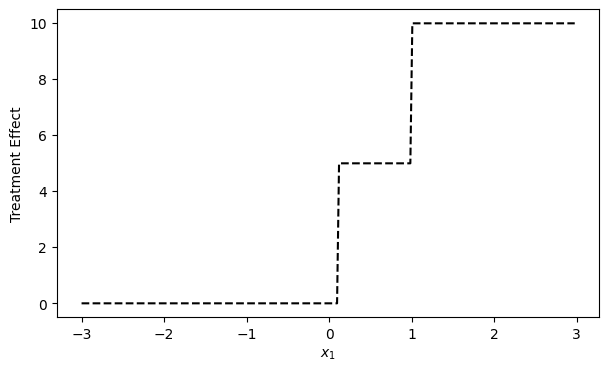

In [ ]:
# 実際の処置効果の計算・可視化
#顧客の収入とCATEを図示
n_test = 250 #テストデータのサンプルサイズを指定(250サンプル)
X_test = multivariate_normal(np.zeros(d), np.diag(np.ones(d)), n_test) #テストデータの共変量を生成。平均が0で共分散が単位行列である多変量正規分布からn_testサンプルを生成
delta = 6/n_test #1つ下のコードで-3から3までの範囲(全部で6)を設定しており、それをテストデータのサンプルサイズで分割
X_test[:, 1] = np.arange(-3, 3, delta) #-3から3までの範囲でdelta間隔の数値を生成
true_effects = np.array([treatment_effect(x) for x in X_test])

plt.figure(figsize=(7, 4))
plt.plot(X_test[:, 1], np.apply_along_axis(treatment_effect, 1, X_test),
color='black', ls='--', label='Baseline')
plt.xlabel('$x_1$')
plt.ylabel('Treatment Effect')
plt.show()

DAGの確認

未観測の交絡因子はない仮定の下で、処置：キャンペーンの有無、結果：売り上げ、共変量：顧客属性など（特に収入）

In [ ]:
#ベースモデルの設定
GBR=GradientBoostingRegressor() #勾配ブースティングによる回帰クラスの設定
GBC=GradientBoostingClassifier() #勾配ブースティングによる分類クラスの設定

# モデルの初期化
models = {
    'S-Learner': SLearner(overall_model=GBR),
    'T-Learner': TLearner(models=(GBR, GBR)),
    'X-Learner': XLearner(models=(GBR, GBR)),
    'DR-Learner': DRLearner(model_regression=GBR, model_propensity=GBC)
}

# モデルの学習と評価
np.random.seed(1) # 乱数のシードを設定
results = {}
for name, model in models.items():
  model.fit(Y, T, X=X)
  preds = model.effect(X_test) # テストデータを用いてCATEを推定
  mse = mean_squared_error(true_effects, preds) # MSEを計算
  results[name] = mse
results

{'S-Learner': 1.2747368817967715,
 'T-Learner': 1.8033674740057357,
 'X-Learner': 0.3591869898488214,
 'DR-Learner': 9.037026078184775}

In [ ]:
#パラメータチューニング
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# 回帰モデルのチューニング
gbr_base = GradientBoostingRegressor(random_state=1)
gbr_grid = GridSearchCV(gbr_base, gbr_params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
gbr_grid.fit(X, Y)
best_GBR = gbr_grid.best_estimator_

# 分類モデルのチューニング
gbc_base = GradientBoostingClassifier(random_state=1)
gbc_grid = GridSearchCV(gbc_base, gbc_params, cv=3, n_jobs=-1, scoring='accuracy')
gbc_grid.fit(X, T)
best_GBC = gbc_grid.best_estimator_

# メタラーナーの構築
models = {
    'S-Learner': SLearner(overall_model=best_GBR),
    'T-Learner': TLearner(models=(best_GBR, best_GBR)),
    'X-Learner': XLearner(models=(best_GBR, best_GBR)),
    'DR-Learner': DRLearner(model_regression=best_GBR, model_propensity=best_GBC)
}

# モデルの評価
np.random.seed(1)
results = {}
for name, model in models.items():
    model.fit(Y, T, X=X)
    preds = model.effect(X_test)
    mse = mean_squared_error(true_effects, preds)
    results[name] = mse

# 結果の表示
print(results)

Best Model: X-Learner
MSE: 0.3591869898488214


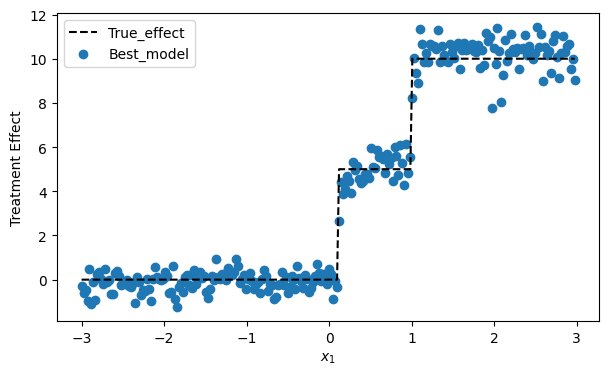

In [ ]:
# 最も精度の高いモデルを選択
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# CATEの推定結果の可視化
print(f"Best Model: {best_model_name}")
print(f"MSE: {results[best_model_name]}")
plt.figure(figsize=(7, 4))
plt.plot(X_test[:, 1], np.apply_along_axis(treatment_effect, 1, X_test),
color='black', ls='--', label='True_effect')
plt.scatter(X_test[:, 1], best_model.effect(X_test), label="Best_model")
plt.xlabel('$x_1$')
plt.ylabel('Treatment Effect')
plt.legend()
plt.show()
#図から顧客の収入が高いほど（特に1より大きいほど）、キャンペーンの効果が高いとわかる

欠点

未観測の交絡因子への対応→感度分析、限定的な交絡因子へはB-Learner

# DML(Double machine learning)

🔍 Double Machine Learning（DML）の理論と実装フロー

---

1. **目的と背景**

DMLは、高次元・非線形な共変量を含む回帰モデルにおいて、機械学習を使いつつ**因果効果（処置効果）**を**一貫性を保って推定**するための手法です。主な課題とその対応策は以下の通りです：

| 課題      | 対応策                       |
| ------- | ------------------------- |
| 正則化バイアス | FWL定理による残差回帰              |
| モデルの過適合 | クロスフィッティング（Cross-fitting） |

---

2. **基本モデルと推定目標**

📌 **モデル：部分線形回帰モデル**

$$
\begin{aligned}
Y &= \theta_0 T + g_0(X) + \varepsilon_Y, \quad \mathbb{E}[\varepsilon_Y \mid X, T] = 0 \\
T &= m_0(X) + \varepsilon_T, \quad \mathbb{E}[\varepsilon_T \mid X] = 0
\end{aligned}
$$

* $Y$：結果変数
* $T$：処置変数
* $X$：共変量（高次元）
* $g_0(X)$, $m_0(X)$：未知の関数（非線形）
* $\theta_0$：推定対象の因果効果

---

3. **損失関数と推定問題**

❗ 通常の最小二乗推定（Plug-in Estimator）

$$
S(\theta_0) = \sum_{i=1}^n \left( Y_i - \theta_0 T_i - g_0(X_i) \right)^2
$$

しかしながら、$g_0(X)$ は未知であるため、機械学習モデル（例：Lasso, Random Forestなど）を用いて推定する。ここで生じる問題が **正則化バイアス** です。

---

4. **収束問題：√n 一致性が得られない理由**

⚠ 問題の核心：

推定量 $\hat{\theta}_0$ が √n 一致（√n-consistent）となるには、共変量効果 $\hat{g}_0(X)$ の推定誤差が十分に速く収束する必要がある。すなわち、

$$
\|\hat{g}_0 - g_0\| = o_p(n^{-1/4})
$$

でなければ、以下のように推定誤差にバイアスが残る：

$$
\sqrt{n}(\hat{\theta}_0 - \theta_0) = \frac{1}{\sqrt{n}} \sum_{i=1}^n \varepsilon_{T,i} \varepsilon_{Y,i} + \underbrace{\frac{1}{\sqrt{n}} \sum_{i=1}^n R_i}_{\text{バイアス項（非消失）}}
$$

ここで $R_i$ は $g_0(X)$, $m_0(X)$ の推定誤差由来の項。これが $o_p(1)$ でない限り、推定量は漸近的に正しくならない。

---

5. **FWL定理を用いた正則化バイアスの排除**

FWL（Frisch–Waugh–Lovell）定理を使い、以下の2段階残差回帰でバイアスを排除：

Step 1: 共変量による予測（機械学習）

* $\hat{g}_0(X) \approx \mathbb{E}[Y|X]$
* $\hat{m}_0(X) \approx \mathbb{E}[T|X]$
* 残差を計算：

  $$
  \tilde{Y}_i = Y_i - \hat{g}_0(X_i), \quad \tilde{T}_i = T_i - \hat{m}_0(X_i)
  $$

Step 2: 残差回帰

$$
\tilde{Y}_i = \theta_0 \tilde{T}_i + \eta_i
$$

この回帰では、機械学習による推定誤差は残差にしか現れず、バイアスの影響を受けにくい。

---

6. **クロスフィッティングによる過適合の制御**

過適合とは：

学習データに過剰適合したモデルが推定誤差を誤って小さく見積もる。

クロスフィット（Cross-fitting）の手順：

1. データを $K$ 分割（例：2-fold）
2. 各Foldで：

   * Fold A：学習用 → Fold Bに予測
   * Fold B：学習用 → Fold Aに予測
3. Foldごとの残差を合体し、残差回帰を実施

→ 自分自身で学習したモデルに対して推定しないため、**オーバーフィットを回避**し、漸近的一貫性を担保。

---

7. **他の手法との比較：サンプルスプリット vs クロスフィット**

| 方法         | バイアス   | 分散    | 備考              |
| ---------- | ------ | ----- | --------------- |
| サンプルスプリット  | 小（不安定） | やや大きい | 計算負荷小、推定精度やや劣る  |
| クロスフィッティング | 小（安定）  | 小     | 情報ロス少、安定性と一貫性高い |

---

8. **まとめ：DMLの特長**

* **Robinson (1988)** に基づく部分線形モデルの変形
* **Chernozhukov et al. (2018)** による、DML理論の漸近的性質の保証
* **FWL定理 + クロスフィッティング**で：

  * 正則化バイアス除去
  * 過適合制御
  * √n一致性を回復
---
[補足]


✅ **ネイマンの直交条件（Neyman Orthogonality）**

■ 目的：

ネイマンの直交条件は、**第一段階（機械学習による g₀(X), m₀(X) の推定誤差）が第二段階の推定（θの推定）に与える影響を最小化**するための数学的条件です。

■ 定義（直観）：

推定対象のスコア関数（または損失関数）を誤差項に対して\*\*直交（＝偏微分してゼロ）\*\*に設計することで、**機械学習モデルの誤差が因果効果推定に与える一次の影響を消す**。

■ 数式での定式化（例）：

スコア関数 $\psi(W; \theta, \eta)$ において、$\eta$ は機械学習で推定する「邪魔なパラメータ」（nuisance parameter）であり、次の条件を満たす：

$$
\left. \frac{\partial}{\partial \eta} \mathbb{E}[\psi(W; \theta_0, \eta)] \right|_{\eta = \eta_0} = 0
$$

これにより、推定誤差 $\hat{\eta} - \eta_0$ の一次の影響が消去され、θの推定精度が高まります。



🧠 **なぜ重要か？**

* 共変量の推定誤差（＝第一段階のノイズ）がθの推定に与える影響を**抑制**できる
* 高次元・非線形な機械学習モデルの導入が**理論的に許容可能になる**
* √n一致性と漸近正規性を**機械学習と共存させる鍵**



📌 DMLではどう使う？

Chernozhukov et al. (2018) のDMLは、**ネイマン直交なスコア関数を構築した上で**クロスフィットと組み合わせ、機械学習推定誤差の影響を排除するという構造になっています。


 🔚 まとめ（簡潔に）：

> ネイマンの直交条件は、「機械学習の誤差が、因果効果（θ）の推定に悪影響を及ぼさないようにスコア関数を設計する」ための条件であり、DMLの理論的な基盤を支える中核概念です。

In [ ]:
'''
Q.DMLのどのモデル（LinearDML:線形回帰モデル,CausalForestDML:非線形データに対応するモデル）が最も精度が高いか？
　また、CATEはどの程度か？
モデルの違い…最後の補足で
'''

!pip uninstall numpy scikit-learn econml
!pip install numpy==1.23.5
!pip install scikit-learn==1.1.3
!pip install econml==0.14.0

  Using cached scikit_learn-1.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
Using cached scikit_learn-1.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (32.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.1.3 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.1.3 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.1.3 which is incompatible.
  Using cached econml-0.14.0-cp311-cp311-linux_x86_64.whl


In [ ]:
from econml.dml import DML, LinearDML, CausalForestDML
import numpy as np
from numpy.random import binomial, multivariate_normal, normal, uniform
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

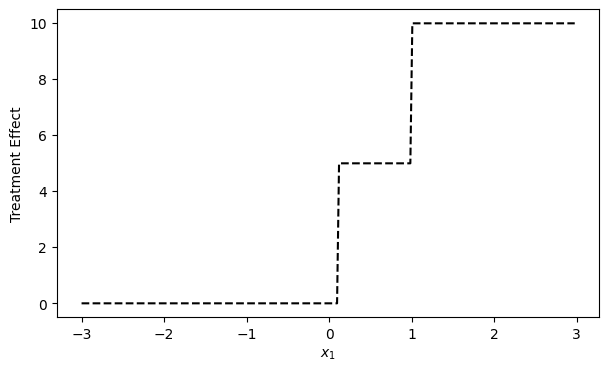

In [ ]:
#メタラーナーと同様
#識別仮定を満たすとする
def generate_data(n, d, controls_outcome, treatment_effect, propensity):
    # 共変量の生成
    X = multivariate_normal(np.zeros(d), np.diag(np.ones(d)), n)# 平均が0で、共分散が単位行列である多変量正規分布から共変量を生成
    # 処置変数の生成
    #処置変数では連続値に対応できる
    T = np.apply_along_axis(lambda x: binomial(1, propensity(x), 1)[0], 1, X)
    # 結果変数の生成
    Y0 = np.apply_along_axis(lambda x: controls_outcome(x), 1, X)
    treat_effect = np.apply_along_axis(lambda x: treatment_effect(x), 1, X)
    Y = Y0 + treat_effect * T
    return (Y, T, X)

np.random.seed(1)
d = 10
n = 1000
def generate_controls_outcome(d):
    beta = uniform(-2, 2, d)
    return lambda x: np.dot(x, beta) + normal(0, 1)
controls_outcome = generate_controls_outcome(d)
treatment_effect = lambda x: 10 if x[1] > 1 else (5 if x[1] > 0.1 else 0)
propensity = lambda x: (0.7 if (x[2]>-0.5 and x[2]<0.5) else 0.3)
Y, T, X = generate_data(n, d, controls_outcome, treatment_effect, propensity)

# 実際の処置効果の計算・可視化
n_test = 250
X_test = multivariate_normal(np.zeros(d), np.diag(np.ones(d)), n_test)
delta = 6/n_test
X_test[:, 1] = np.arange(-3, 3, delta)
true_effects = np.array([treatment_effect(x) for x in X_test])
plt.figure(figsize=(7, 4))
plt.plot(X_test[:, 1], np.apply_along_axis(treatment_effect, 1, X_test), color='black', ls='--', label='Baseline')
plt.xlabel('$x_1$')
plt.ylabel('Treatment Effect')
plt.show()

In [ ]:
#Base modelの設定
GBR=GradientBoostingRegressor()
GBC=GradientBoostingClassifier()

# モデルの初期化
models_DML = {
    'LinearDML':LinearDML(model_y=GBR, # Y(結果変数)のモデルとして勾配ブースティングによる回帰を使用
                          model_t=GBC, # T(処置変数)のモデルとして勾配ブースティングによる分類を使用
                          discrete_treatment=True, # 処置が離散的であることを示す
                          cv=6), # 6-fold クロスバリデーションを使用

    'CausalForestDML':CausalForestDML(model_y=GBR, # Y(結果変数)のモデルとして勾配ブースティングによる回帰を使用
                                      model_t=GBC, # T(処置変数)のモデルとして勾配ブースティングによる分類を使用
                                      discrete_treatment=True, # 処置が離散的であることを示す
                                      cv=6) # 6-fold クロスバリデーションを使用
    }

# モデルの学習と評価
np.random.seed(1) # 乱数のシードを設定
results_DML = {}
for name, model in models_DML.items():
  model.fit(Y, T, X=X)
  preds = model.effect(X_test)
  mse = mean_squared_error(true_effects, preds)
  results_DML[name] = mse
results_DML

'''
{'LinearDML': 7.023871510948287, 'CausalForestDML': 0.2926810063627794}
-> CausalForestDMLの方が精度が高い
'''

{'LinearDML': 7.023871510948287, 'CausalForestDML': 0.2926810063627794}

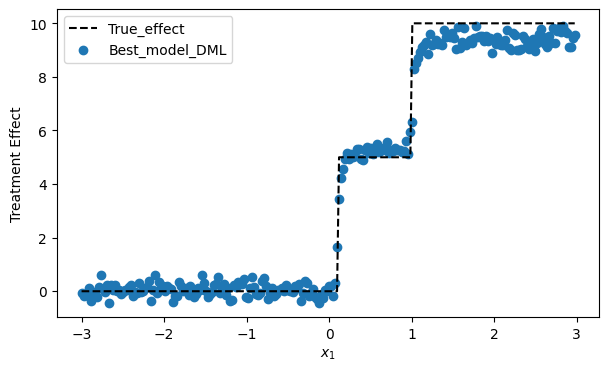

In [ ]:
# 最も精度の高いモデルを選択し、テストデータセットに対する処置効果を推定
best_model_name_DML = min(results_DML, key=results_DML.get)
best_model_DML = models_DML[best_model_name_DML]
DML_pred = best_model_DML.effect(X_test) # X_testに基づいて処置効果を予測

# 結果を可視化
plt.figure(figsize=(7, 4))
plt.plot(X_test[:, 1], np.apply_along_axis(treatment_effect, 1, X_test),
color='black', ls='--', label='True_effect')
plt.scatter(X_test[:, 1], DML_pred, label="Best_model_DML")
plt.xlabel('$x_1$')
plt.ylabel('Treatment Effect')
plt.legend()
plt.show()

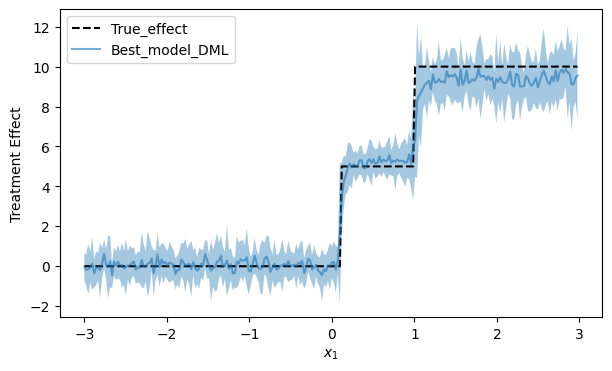

In [ ]:
#信頼区間の表示
lb, ub = best_model_DML.effect_interval(X_test, alpha=0.01)

#結果を可視化
plt.figure(figsize=(7, 4))
plt.plot(X_test[:, 1], np.apply_along_axis(treatment_effect, 1, X_test),
color='black', ls='--', label='True_effect')
plt.plot(X_test[:, 1], DML_pred, label="Best_model_DML", alpha=.6)
plt.fill_between(X_test[:, 1], lb, ub, alpha=.4)
plt.xlabel('$x_1$')
plt.ylabel('Treatment Effect')
plt.legend(loc='upper left')
plt.show()

[補足]

✅ 共通点（DML の基本構造）

* 両者とも、交差適合（cross-fitting）や残差化（residualization）を利用してバイアスを減らす。
* 目的は\*\*処置効果（治療効果）\*\*の推定、すなわち $\text{ATE}$, $\text{CATE}$, $\text{ITE}$ の推定。
* 処置割り当て（Treatment Assignment）や結果（Outcome）を予測するために機械学習モデルを利用。
* 手法は基本的に「回帰残差に対する回帰」を行う形で因果効果を分離。

---

🟩 LinearDML の因果推論過程

**推定方法**：
処置効果（例えば $\tau$）が**線形**であると仮定して、**回帰残差に対して線形回帰**を行う。

流れ：

1. **機械学習を用いて**次の2つを推定：

   * 処置の予測： $\hat{T}(X)$
   * アウトカムの予測： $\hat{Y}(X)$

2. 残差を計算：

   * $\tilde{T} = T - \hat{T}(X)$
   * $\tilde{Y} = Y - \hat{Y}(X)$

3. 残差回帰（線形）：

   * $\tilde{Y} = \tau \cdot \tilde{T} + \epsilon$
   * ここで、$\tau$ は\*\*全体効果（ATE）\*\*か、\*\*CATE（共変量に依存する効果）\*\*の線形部分。

仮定：

* 処置効果が「線形」または「線形構造を持つ」。
* 機械学習モデルはアウトカムと処置の条件付き期待値を十分に予測できる。

利点：

* 解釈がシンプル（係数として効果を表現）。
* 線形な政策介入のモデルに向いている。

---

🟦 Causal Forest DML の因果推論過程

**推定方法**：
**ランダムフォレストの拡張（Causal Forest）**を使って、局所的な処置効果（CATE）を**非線形に柔軟に**推定する。

流れ：

1. **機械学習を使って**次を推定（同じく交差適合を活用）：

   * $\hat{T}(X)$
   * $\hat{Y}(X)$

2. 残差計算：

   * $\tilde{T} = T - \hat{T}(X)$
   * $\tilde{Y} = Y - \hat{Y}(X)$

3. Causal Forest による学習：

   * 各ノード内で、$\tilde{Y}$ を $\tilde{T}$ に対して回帰。
   * 木構造に基づいて、似た観測値同士をクラスタリングし、\*\*局所的な効果（CATE）\*\*を推定。

仮定：

* 効果が\*\*非線形かつ異質的（heterogeneous）\*\*である可能性がある。
* 木構造により、局所的に類似したグループごとの処置効果を推定。

利点：

* 処置効果の非線形性・異質性をキャプチャ可能。
* 可視化やポリシー最適化にも利用しやすい。

---

🔁 違いのまとめ

| 特徴       | LinearDML       | Causal Forest DML                        |
| -------- | --------------- | ---------------------------------------- |
| 処置効果のモデル | 線形              | 非線形・異質性あり                                |
| 推定方法     | 線形回帰            | ランダムフォレストベースの木構造                         |
| 解釈のしやすさ  | 高い（係数で表現）       | やや低い（ブラックボックス気味）                         |
| 処置効果の種類  | 主に ATE や線形 CATE | 局所的 CATE（Heterogeneous Treatment Effect） |
| モデル柔軟性   | 低い（線形に制限）       | 高い（任意の非線形構造を捉える）                         |

---

🚀 選び方の指針

* **効果が一定 or 線形っぽい** → LinearDML
* **効果が個人・集団によって違いそう** → Causal Forest DML

[課題]

交絡因子が存在しない仮定→存在するときは？

1.   バックドア基準により交絡因子の特定・調整
2.   感度分析により未観測の交絡因子の影響を加味してバイアスがどの程度あるか検証

# CATEを推定するその他の手法

1.   Causal Forest

概要

Causal Forest は、**異質的処置効果（Heterogeneous Treatment Effect: HTE）**を推定するために設計されたアルゴリズムで、観察データにおける処置（介入）の因果効果を推定

アルゴリズムの概要

**目的**

   個々のユニットに対する処置効果（治療の効果）
   $\tau(x) = \mathbb{E}[Y(1) - Y(0) \mid X = x]$ を推定する。

**ブートストラップサンプリング**

   通常の回帰木は「予測誤差（MSE）」でスプリットしますが、Causal Forest では**処置効果の異質性（ばらつき）**を最大にするようなスプリット基準を採用。

**回帰木の学習**

   * データを分割し、片方で木の構造を構築し、もう片方で処置効果を推定。
   * これにより**バイアスを減らし、過学習を防止**。

**アンサンブル（森）**

   * 多数のCausal Treeを構築し、推定を平均化して安定化。

🧠 対処している問題

* 処置効果が人によって異なる状況（例：薬が効く人・効かない人）
* **高次元の共変量（X）**に応じた因果効果の変化
* 観察データのバイアス（処置がランダムでない場合）
* 非線形データでも、CATEの漸近正規性により信頼区間の可視化ができる。

---

2. Causal BART（Bayesian Additive Regression Trees for Causal Inference）


🔍 概要

Causal BART は、**ベイズ回帰木（BART）**を因果推論に応用した手法。BART 自体は、複数の浅い決定木の加法モデルとして働き、処置効果の予測に高い柔軟性をつ。

BART for Causal Inference では、各ユニットに対して

* 処置を受けた場合の予測 $\hat{Y}_i(1)$
* 処置を受けなかった場合の予測 $\hat{Y}_i(0)$
  をそれぞれ**ベイズ的に推定**し、その差 $\hat{\tau}_i = \hat{Y}_i(1) - \hat{Y}_i(0)$ を得ます。


 アルゴリズムの概要

1. **2つのモデル構築**

   * 処置群：$Y_i \mid T_i = 1 \sim \text{BART}(X_i)$
   * 対照群：$Y_i \mid T_i = 0 \sim \text{BART}(X_i)$

2. **反実仮想（counterfactual）推定**

   * 各ユニットに対して「受けなかった方の処置」のアウトカムも予測。

3. **MCMC によるパラメータの事後分布推定**

   * BARTは、MCMC（Markov Chain Monte Carlo）を使って木構造・スプリット・終端値などの**事後分布をサンプリング**し、予測分布や信頼区間を出力。
   * **MCMCとは？**
     マルコフ連鎖モンテカルロ法。確率分布（特に事後分布）からサンプルを得るための手法。ベイズ推論の基本技術。


 対処している問題

| 問題            | なぜ起きるか                 | Causal BARTによる解決策             |
| ------------- | ---------------------- | ----------------------------- |
| ① 正則化によるバイアス  | 予測目的のモデルが因果構造を無視       | 処置効果を直接モデリング + ベイズ推定で柔軟性確保    |
| ② 異質性による分散の暴れ | 効果が個別に異なり、単純モデルで表現できない | BARTの木構造が局所的差異を捉え、MCMCで分散を可視化 |




| 特徴        | Causal Forest (econml / causalml) | Causal BART (bartpy など) |
| --------- | --------------------------------- | ----------------------- |
| 実装の安定性    | ◎（Microsoft公式サポート）                | △（Python実装は不安定）         |
| 柔軟性       | 高いが木ベースに制限                        | 非常に高い（非線形性・交互作用）        |
| 結果の信頼区間   | Bootstrapで構築                      | MCMCにより自然に得られる          |
| ハイパーパラメータ | 少なめ（比較的自動）                        | 多め（MCMC設定も必要）           |
| 処理速度      | 速い                                | 遅い（MCMC計算が必要）           |





# 自然実験への機械学習の適用

| 自然実験手法         | 機械学習ベースの発展手法               | 対応する問題                        | 使用されるML技術                     | 実装ライブラリ例               | 特徴・強み               |
| -------------- | -------------------------- | ----------------------------- | ----------------------------- | ---------------------- | ------------------- |
| **操作変数（IV）**   | **DeepIV**                 | 非線形な $T \sim Z$、$Y \sim T$    | ニューラルネットによる密度推定・応答面回帰         | `deepiv`, `EconML`     | 密度学習＋反実仮想予測を統合      |
|                | **DRIV**                   | 弱いIV、CATEの異質性                 | 決定木、NN、正則化回帰                  | `EconML`               | DMLベースでロバストなCATE推定  |
|                | **AGMM (Adversarial GMM)** | エンドジェネイティ（内生性）、複雑な構造          | GANのような敵対的最適化                 | `EconML`               | 推定誤差を最小化する2プレイヤーゲーム |
| **差の差（DiD）**   | **Synthetic DiD**          | 仮定違反（parallel trends）、高次元の共変量 | 合成コントロール＋ElasticNet           | `sdid`, `scikit-learn` | 機械学習で加重選択、柔軟な前処理    |
|                | **Matrix Completion DiD**  | 欠損・不均一なパネル構造                  | 行列分解（低ランク近似）                  | `EconML`, `R` packages | 多数欠損下でもDiD可能        |
|                | **DoubleML for DiD**       | バイアス除去、時間・群の交絡                | MLによる残差構築 + orthogonalization | `DoubleML`             | 因果推定とMLを分離して推定      |
| **回帰不連続（RDD）** | **Causal Forest for RDD**  | 閾値周辺での非線形性、ノイズ                | ランダムフォレスト系                    | `grf`, `EconML`        | 局所的CATE推定に強い        |
|                | **Bayesian RDD**           | 不連続点の不確実性、事前知識の統合             | ベイズ回帰＋MCMC                    | `rddapp`, `rstan`      | 信頼区間と不確実性を可視化       |
|                | **R-Learner for RDD**      | 処置効果のスムーズ推定                   | 任意のML（NN、RF、XGBoostなど）        | `EconML`, `DoubleML`   | スムーズで拡張性の高いR形式の推定   |


自然実験では、ランダム化された割り当てがない代わりに、**外生的な変化（政策変更、制度、地理的制約など）**を用いて因果効果を識別する。

操作変数（Instrumental Variable, IV）Zは：

1.処置𝑇に影響を与える（関連性）

2.処置Tを通して以外で、アウトカム𝑌に影響しない（排除制約）

3.Yと共通の原因を持たない（外生性）

→2.と3.の前提の証明が困難

---
DRIV（Deep Robust Instrumental Variables）

例：処置T＝会員登録、結果Y=ユーザー効用、交絡因子C=ユーザー属性など、未観測の交絡因子U　のとき...

Q1.会員登録の促進はユーザーの効用を高めるのか<br>
→操作変数Zをユーザーへのランダムな割り当て（ワンクリック会員登録/通常の会員登録）としたとき、排除制約と外生性を満たす<br>
→操作変数法により因果効果の推定が可能になる

Q2.どのユーザーに対してこの施策を行うべきか<br>
→複雑かつ大量の変数を扱うため、機械学習を活用

目的：CATE（異質な処置効果）のロバストな推定

モデル構造：

Stage 1: 機械学習で𝑇の IV 予測（ドレッジ法でもOK）

Stage 2: Orthogonalization（直交化）によりバイアスを低減

Stage 3: 最終的にCATE関数を回帰（深層学習など）


# 因果的意思決定

因果的意思決定の問＝「期待効用が最大となる選択肢はどれか？」

例：機械学習に基づいて作られた特定の状況・制約下での意思決定の性能をオフライン評価するためのOff-Policy Evaluation (OPE)

（参考：[Off-Policy Evaluationの基礎とZOZOTOWN大規模公開実データおよびパッケージ紹介](https://techblog.zozo.com/entry/openbanditproject)）

---

 🔶 問題設定

* 各ユーザー $i$ に対して、観測される情報は：

  * **共変量（特徴量）**: $X_i \in \mathcal{X}$
  * **選択された行動（選択肢）**: $A_i \in \{1, 2, 3\}$
  * **得られた結果（効用、報酬）**: $Y_i \in \mathbb{R}$
* 任意の方策（policy） $\pi$ において、行動をとる確率は次のように与えられる：

  $$
  \pi(a|x) = \mathbb{P}_\pi(A = a | X = x)
  $$

  これは\*\*確率的な意思決定モデル（stochastic policy）\*\*を表す。


 🔶 期待効用（policy value）

ある方策 $\pi$ に従って意思決定をした場合の **期待効用（policy value）** は次のように定義される：

$$
V(\pi) = \mathbb{E}_{X \sim \mathcal{D}} \left[ \sum_{a \in \mathcal{A}} \pi(a|X) \cdot \mathbb{E}[Y | X, A = a] \right]
$$

これは、「方策 $\pi$ に従って行動を選んだときの期待される報酬」を表しています。



 🔶 最適方策とレグレット（Regret）

* 最適な方策は、期待効用を最大化する方策：

$$
\pi^* = \arg\max_{\pi} V(\pi)
$$

* 任意の方策 $\pi$ に対して、その\*\*後悔（regret）\*\*は次で定義される：

$$
R(\pi) = V(\pi^*) - V(\pi)
$$

したがって、**期待効用の最大化は、regretの最小化と同義**です。



 🔶 OPE（Off-Policy Evaluation）の目的

実際には、ある**ログポリシー（データ収集ポリシー）** $\mu(a|x)$ に基づいたデータ $(X_i, A_i, Y_i)$ しか得られない。このとき、異なるポリシー $\pi$ の下での $V(\pi)$ を推定するのが OPE の目的です。

OPEの代表的な推定方法の一つに **逆確率重み付け（IPS）** があります：

$$
\hat{V}_{\text{IPS}}(\pi) = \frac{1}{n} \sum_{i=1}^{n} \frac{\pi(A_i | X_i)}{\mu(A_i | X_i)} Y_i
$$

これは、ログポリシーから得られたデータを再重み付けして、異なる方策 $\pi$ の期待効用を推定する方法です。

---
[補足]

MSEではなく、Regretを使う理由

🔶 MSE と Regret の違い

| 指標         | 定義                                      | 主な用途        | 目的                   |
| ---------- | --------------------------------------- | ----------- | -------------------- |
| **MSE**    | $\mathbb{E}[(\hat{V}(\pi) - V(\pi))^2]$ | 推定精度の評価     | 「効用の推定がどれだけ正確か」を測る   |
| **Regret** | $V(\pi^*) - V(\pi)$                     | 意思決定の最適性の評価 | 「どの方策を選べば最も良いか」を判断する |


 ✅ **Regretを使う理由：**

* たとえ $V(\pi)$ の推定誤差（MSE）が小さくても、**誤った方策を最適と誤認して選んでしまえば、実際の効用が大きく下がる可能性がある。**
* 真に最適な方策に近いものを選べれば、多少推定誤差が大きくても実用上の損失（Regret）は小さい場合がある。


 🔶 簡単な例

 ◆ 例：3つの方策の評価

| 方策      | 真の効用 $V(\pi)$ | 推定効用 $\hat{V}(\pi)$ | MSE    | Regret         |
| ------- | ------------- | ------------------- | ------ | -------------- |
| $\pi_1$ | 0.8           | **0.85**            | 0.0025 | **0.0** ←選択される |
| $\pi_2$ | 0.9           | **0.82**            | 0.0064 | **0.1** ←本当は最良 |
| $\pi_3$ | 0.7           | 0.72                | 0.0004 | 0.2            |


 解説：

* MSE で見ると、$\pi_3$ の推定が一番正確に見える（MSEが最小）。
* しかし、意思決定で使うと $\hat{V}(\pi_1) = 0.85$ を最大と判断して $\pi_1$ を選ぶ。
* 本当の最適方策は $\pi_2$ なので、**Regret = $0.9 - 0.8 = 0.1$** が生じる。

つまり、**精度が高い方策（MSE最小）を選んでも、最適な選択ができるとは限らない**のです。


In [17]:
# Python3.9のインストール＆切替（まだなら実行）
!sudo apt-get update -y
!sudo apt-get install python3.9 python3.9-dev python3.9-distutils -y

# python3.9用pipのインストール
!wget https://bootstrap.pypa.io/get-pip.py
!python3.9 get-pip.py

# pythonのシンボリックリンクを切り替え（先にリンク削除）
import os
for link in ["/usr/bin/python", "/usr/local/bin/python", "/usr/local/bin/pip"]:
    if os.path.islink(link) or os.path.exists(link):
        os.remove(link)

os.symlink("/usr/bin/python3.9", "/usr/bin/python")
os.symlink("/usr/bin/python3.9", "/usr/local/bin/python")
os.symlink("/usr/local/bin/pip3", "/usr/local/bin/pip")

print("Python3.9 に切り替えました。必ずランタイムを再起動してください。")


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [1]:
# Colabのシェル実行に変更
!git clone https://github.com/st-tech/zr-obp.git
%cd zr-obp

# obp と依存ライブラリをpipでインストール
!pip install -r requirements.txt
!pip install -e .

Cloning into 'zr-obp'...
remote: Enumerating objects: 6652, done.
remote: Counting objects: 100% (727/727), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 6652 (delta 629), reused 605 (delta 605), pack-reused 5925 (from 2)
Receiving objects: 100% (6652/6652), 29.21 MiB | 13.69 MiB/s, done.
Resolving deltas: 100% (4675/4675), done.
/content/zr-obp
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Obtaining file:///content/zr-obp
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for obp (pyproject.toml) ... done
  Created wheel for obp: filename=obp-0.5.5-py3-none-any.whl size=5382 sha256=64033519784b47b6ee75e7cc024ec092a4417c9a9ebca0c78454a188f5ae9571
  Stored in directory: /tmp/pip-ephem-wheel-cache-no_o4mfm/wheels/f7/3c/a9/e8b9a8da745598d3b